# Beispiel Datenanalyse

Dieses Notebook wird im [Video](https://vimeo.com/624422625/2324a2f824) erklärt.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import holidays
import seaborn as sns
import plotly
import plotly.graph_objects as go
import sys
import os
import locale
from distutils.spawn import find_executable

print('Versionen der verwendeten python-Module: ')
print('numpy', np.__version__)
print('matplotlib', matplotlib.__version__)
print('pandas', pd.__version__)
print('datetime', dt)
print('holidays', holidays.__version__)
print('seaborn', sns.__version__)
print('plotly', plotly.__version__)
print('sys', sys.version)
print('os', os)
print('locale', locale)

Versionen der verwendeten python-Module: 
numpy 1.20.3
matplotlib 3.4.2
pandas 1.3.2
datetime <module 'datetime' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/21sye/lib/python3.9/datetime.py'>
holidays 0.11.2
seaborn 0.11.2
plotly 5.1.0
sys 3.9.6 (default, Aug 18 2021, 19:38:01) 
[GCC 7.5.0]
os <module 'os' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/21sye/lib/python3.9/os.py'>
locale <module 'locale' from '/home/franzi/.pyenv/versions/miniconda3-latest/envs/21sye/lib/python3.9/locale.py'>


In [2]:
plt.rcParams['savefig.dpi'] = 75
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
locale.setlocale(locale.LC_ALL, '')
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

if find_executable('latex'):
    plt.rcParams['text.usetex'] = True
    pd.set_option('display.latex.repr', True)
    pd.set_option('display.latex.longtable', True)

In [3]:
data = pd.read_csv('https://github.com/jenfly/opsd/raw/master/opsd_germany_daily.csv')

In [4]:
#data

In [5]:
data.set_index('Date', inplace=True)

In [6]:
data.index = pd.to_datetime(data.index)

In [7]:
for name in data.columns:
    data.rename(columns={name:name+' [GWh]'}, inplace=True)

<AxesSubplot:xlabel='Date'>

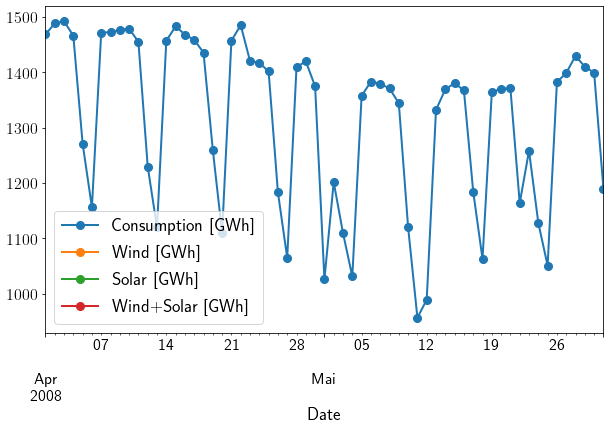

In [8]:
data.loc['2008-04':'2008-05'].plot(marker='o')

In [9]:
weekdays = [0,1,2,3,4,5,6]

p_mean_days = []

for i in weekdays:
    filt = (data.index.weekday == i)
    p_mean = data.loc[filt, 'Consumption [GWh]'].mean()
    p_mean_days.append(p_mean)

In [10]:
plt.bar(weekdays, p_mean_days)
plt.title('Mittlerer Energiebedarf für jeden Wochentag')
plt.xlabel('Wochentage [0:Montag, 6:Sonntag]')
plt.ylabel('Energie [GWh]')

Text(0, 0.5, 'Energie [GWh]')

In [11]:
yearly_data = data.resample('a').sum()/1000

In [12]:
#yearly_data

(0.0, 600.0)

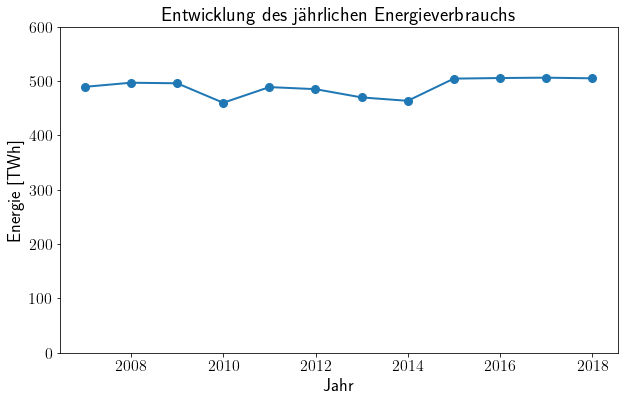

In [13]:
plt.plot(yearly_data.index, yearly_data['Consumption [GWh]'], marker='o')
plt.title('Entwicklung des jährlichen Energieverbrauchs')
plt.xlabel('Jahr')
plt.ylabel('Energie [TWh]')
plt.ylim(0,600)